In [1]:
#importing necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, ReLU
from keras.optimizers import Adam, Adagrad

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from os.path import dirname, join as pjoin
import scipy.io as sio

#Import the notMNIST dataset
mat_fname = "C:/Users/USER/Documents/PythonFiles/DL_Midterm_No7/data/notmnist/notMNIST_small.mat"
mat_contents = sio.loadmat(mat_fname)

X = mat_contents["images"].transpose()
Y = mat_contents["labels"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Using TensorFlow backend.


In [2]:
#Mean subtraction and normalization on the input data

mean_train = np.mean(x_train)
std_train = np.std(x_train)

mean_test = np.mean(x_test)
std_test = np.std(x_test)

x_train_norm = (x_train - mean_train)/std_train
x_test_norm = (x_test - mean_test)/std_test

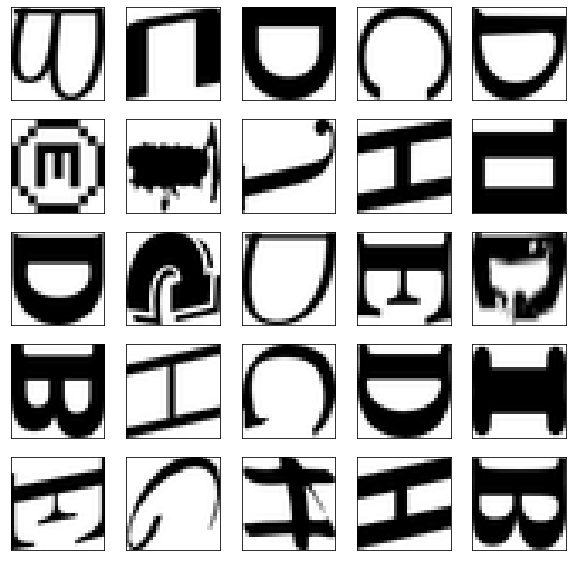

In [3]:
#Checking the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_norm[i], cmap=plt.cm.binary)
plt.show()

In [4]:
#Splitting the training data to train and verification data
x_train_norm, x_validate, y_train, y_validate = train_test_split(
    x_train_norm, y_train, test_size=0.2, random_state=12345,
)

#Reshaping the data
img_rows = 28
img_cols = 28
batch_size = 512
img_shape = (img_rows, img_cols, 1)

x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], *img_shape)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], *img_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *img_shape)

In [5]:
#Building the model

name = 'Xavier_2Layer'
modelXavier2L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, 
           kernel_initializer='glorot_normal', name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = 'He_2Layer'
modelHe2L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, kernel_initializer='he_normal', name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='He_3Layer'
modelHe3L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, kernel_initializer='he_normal', name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D_Layer3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)


name = 'Xavier_2Layer_LeakyRELU'
modelXavier2LLeakyRELU = Sequential([
    Conv2D(32, kernel_size=3, input_shape=img_shape, kernel_initializer='glorot_normal', name='Conv2D_Layer1'),
    LeakyReLU(),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, name='Conv2D_Layer2'),
    LeakyReLU(),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, name='Dense'),
    LeakyReLU(),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = 'He_2Layer_L2'
modelHe2LL2 = Sequential([
    Conv2D(32, kernel_size=3, input_shape=img_shape, kernel_initializer='he_normal', 
           activity_regularizer=tf.keras.regularizers.l2(10e-3), name='Conv2D_Layer1'),
    ReLU(),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Conv2D(64, kernel_size=3, activity_regularizer=tf.keras.regularizers.l2(10e-3), name='Conv2D_Layer2'),
    ReLU(),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [modelXavier2L, modelHe2L, modelHe3L, modelXavier2LLeakyRELU, modelHe2LL2]

In [6]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adagrad(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train_norm, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 11234 samples, validate on 2809 samples
Epoch 1/10
11234/11234 [==============================] - 4s 354us/step - loss: 1.3393 - accuracy: 0.6226 - val_loss: 0.5359 - val_accuracy: 0.8572
Epoch 2/10
11234/11234 [==============================] - 4s 348us/step - loss: 0.4317 - accuracy: 0.8770 - val_loss: 0.4152 - val_accuracy: 0.8839
Epoch 3/10
11234/11234 [==============================] - 4s 348us/step - loss: 0.3393 - accuracy: 0.8999 - val_loss: 0.3434 - val_accuracy: 0.9010
Epoch 4/10
11234/11234 [==============================] - 4s 350us/step - loss: 0.2868 - accuracy: 0.9161 - val_loss: 0.3167 - val_accuracy: 0.9092
Epoch 5/10
11234/11234 [==============================] - 4s 349us/step - loss: 0.2503 - accuracy: 0.9262 - val_loss: 0.2909 - val_accuracy: 0.9160
Epoch 6/10
11234/11234 [==============================] - 4s 343us/step - loss: 0.2285 - accuracy: 0.9312 - val_loss: 0.2736 - val_accuracy: 0.9199
Epoch 7/10
11234/11234 [==============================] - 4s 34

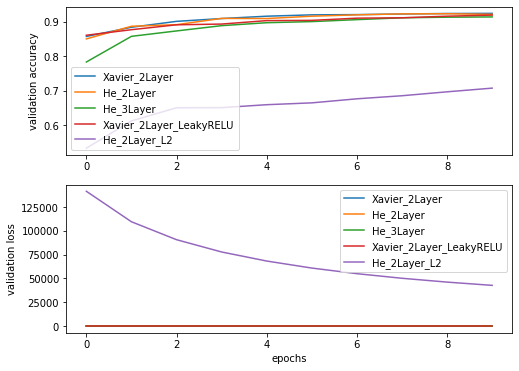

In [7]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()